
>This NB provides a framework to think like a data scientist

# Table of Contents
1. [Chapter 1 - How a Data Scientist Beat the Odds](#ch1)
1. [Chapter 2 - A Data Science Framework](#ch2)
1. [Chapter 3 - Step 1: Define the Problem and Step 2: Gather the Data](#ch3)
1. [Chapter 4 - Step 3: Prepare Data for Consumption](#ch4)
1. [Chapter 5 - The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting](#ch5)
1. [Chapter 6 - Step 4: Perform Exploratory Analysis with Statistics](#ch6)
1. [Chapter 7 - Step 5: Model Data](#ch7)
1. [Chapter 8 - Evaluate Model Performance](#ch8)
1. [Chapter 9 - Tune Model with Hyper-Parameters](#ch9)
1. [Chapter 10 - Tune Model with Feature Selection](#ch10)
1. [Chapter 11 - Step 6: Validate and Implement](#ch11)
1. [Chapter 12 - Conclusion and Step 7: Optimize and Strategize](#ch12)
1. [Change Log](#ch90)
1. [Credits](#ch91)

<a id="ch1"></a>
# How a Data Scientist Beat the Odds
It's the classical problem, predict the outcome of a binary event, where statistically, a random guess should achieve a 50% accuracy rate

*What happens when technology is too smart for its own good?*
![Funny Autocorrect](http://15858-presscdn-0-65.pagely.netdna-cdn.com/wp-content/uploads/2016/03/hilarious-autocorrect-fails-20x.jpg)

<a id="ch2"></a>
# A Data Science Framework
1. **Define the Problem:** 
    * Problems before requirements
    * requirements before solutions
    * solutions before design
    * design before technology.
    
Too often we are quick to jump on the new shiny technology, tool, or algorithm before determining the actual problem we are trying to solve.
    
2. **Gather the Data:** It may be 
    * external or internal, 
    * structured or unstructured, 
    * static or streamed, 
    * objective or subjective, etc. 
As the saying goes, you don't have to reinvent the wheel, you just have to know where to find it. In the next step, we will worry about transforming "dirty data" to "clean data."

3. **Prepare Data for Consumption:** ("data wrangling": turn “wild” data into “manageable” data); includes 
    * implementing data architectures for storage and processing, 
    * developing data governance standards for quality and control, 
    * data extraction (i.e. ETL and web scraping), 
    * and data cleaning to identify aberrant, missing, or outlier data points.


4. **Perform Exploratory Analysis:** This means
    * deploy descriptive and graphical statistics to look for potential problems, patterns, classifications, correlations and comparisons in the dataset. 
    * data categorization (i.e. qualitative vs quantitative) is also important to understand and select the correct _hypothesis test_ or _data model_.


5. **Model Data:** Goal: either summarize the data or predict future outcomes. <br/>
**_The dataset and expected results, will determine the model/algorithms available for use._** <br/>
It's important to remember: the wrong model and/or it's algorithm can lead to poor performance at best and the wrong conclusion.

6. **Validate and Implement Data Model:** 

Train the model on a subset of your data; then test: helps to determine is the [model overfits, generalizes, or underfits the dataset](http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html).


7. **Optimize and Strategize:** iterate back through the process to make it better...stronger...faster.

As a data scientist, your strategy should be to have more time to focus on recommendations and design; therefore
* outsource developer operations and 
* application plumbing,

Once you're able to package your ideas, this becomes your “currency exchange" rate.

<hr style="border: solid rgb(0,0,0) 0.0px; background-color: rgb(0,0,0);height: 5.0px;"/>

<a id="ch3"></a>
# Step 1: Define the Problem

The problem statement: predict the survival outcome of passengers on the Titanic.
* Determine what sorts of people were likely to survive. 
* In particular, predict _which_ passengers survived the tragedy (Binary classification)

<hr style="border: 4px dashed #aaaaaa; border-style: none none dashed; color: #fff; background-color: #fff;"/>

# Step 2: Gather the Data

The dataset is also given to us on a golden plater with test and train data at [Kaggle's Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

<hr style="border: 4px dashed #aaaaaa; border-style: none none dashed; color: #fff; background-color: #fff;"/>

<a id="ch4"></a>
# Step 3: Prepare Data for Consumption
Here, data wrangling is out of scope; only data cleaning is in scope.

## 3.1 Library imports

### 3.1.1 Import basic libraries
The following code is written in Python 3.x.

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../../datasets/titanic/input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]
pandas version: 0.24.1
matplotlib version: 3.0.2
NumPy version: 1.18.1
SciPy version: 1.4.1
IPython version: 7.5.0
scikit-learn version: 0.22.1
-------------------------
gender_submission.csv
test.csv
train.csv



**Note** from the original kernel, the following were used:
```
Python version: 3.6.3 |Anaconda custom (64-bit)| (default, Nov 20 2017, 20:41:42) 
[GCC 7.2.0]
pandas version: 0.20.3
matplotlib version: 2.1.1
NumPy version: 1.13.0
SciPy version: 1.0.0
IPython version: 5.3.0
scikit-learn version: 0.19.1
-------------------------
gender_submission.csv
test.csv
train.csv
```

### 3.1.2 Load Data Modelling Libraries

In `scikit-learn` or `sklearn`, algorithms are called **Estimators** and implemented in their own classes.

In [6]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

<hr style="border: 4px dotted #aaaaaa; border-style: none none dotted; color: #fff; background-color: #fff;"/>

## 3.2 Meet and Greet Data

Get to know your data
* What does it look like (datatype and values)
* identify
    * independent/feature variables(s)
    * dependent/target variable(s)

First load and then use the `pandas.DataFrame.info()` and `pandas.DataFrame.sample()` functions, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). Click here for the [Source Data Dictionary](https://www.kaggle.com/c/titanic/data).

In [9]:
!ls '../../datasets/titanic/input'

gender_submission.csv  test.csv  train.csv


In [10]:
datadir = '../../datasets/titanic/'

#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
data_raw = pd.read_csv(datadir + './input/train.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv(datadir + './input/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
print (data_raw.info()) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
#data_raw.head() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html
#data_raw.tail() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html
data_raw.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S
281,282,0,3,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,NaN,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q


#### Some notes on the data

1. The *Survived* variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables. **It's important to note, more predictor variables do not make a better model, but the right variables.**
2. The *PassengerID* and *Ticket* variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
3. The *Pclass* variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
4. The *Name* variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
5. The *Sex* and *Embarked* variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
6. The *Age* and *Fare* variable are continuous quantitative datatypes.
7. The *SibSp* represents number of related siblings/spouse aboard and *Parch* represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
8. The *Cabin* variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred and SES from deck levels. However, since there are many null values, it does not add value and thus is excluded from analysis.

<a id="ch5"></a>
### 3.2.2 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
In this stage, we will clean our data by 1) correcting aberrant values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

1. **Correcting:** Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.
2. **Completing:** There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. For this dataset, age will be imputed with the median, the cabin attribute will be dropped, and embark will be imputed with mode. Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.
3. **Creating:**  Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.
4. **Converting:** Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

In [11]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fry, Mr. Richard",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3.2.2 Clean Data

Now that we know what to clean, let's execute our code.

** Developer Documentation: **
* [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)
* [pandas.DataFrame.info](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)
* [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)
* [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html)
* [pandas.isnull](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)
* [pandas.DataFrame.sum](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
* [pandas.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
* [pandas.DataFrame.copy](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html)
* [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
* [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)
* [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
* [pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html)

In [12]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [13]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
472,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,27.7500,S,4,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
822,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0000,S,1,1,Misc,"(-0.001, 7.91]","(32.0, 48.0]"
64,0,1,"Stewart, Mr. Albert A",male,28.0,0,0,27.7208,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
708,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,151.5500,S,1,1,Miss,"(31.0, 512.329]","(16.0, 32.0]"
178,0,2,"Hale, Mr. Reginald",male,30.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
518,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(32.0, 48.0]"
158,0,3,"Smiljanic, Mr. Mile",male,28.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
594,0,2,"Chapman, Mr. John Henry",male,37.0,1,0,26.0000,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
462,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,38.5000,S,1,1,Mr,"(31.0, 512.329]","(32.0, 48.0]"
40,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,9.4750,S,2,0,Mrs,"(7.91, 14.454]","(32.0, 48.0]"


## 3.2.3 Convert Formats

We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

** Developer Documentation: **
* [Categorical Encoding](http://pbpython.com/categorical-encoding.html)
* [Sklearn LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* [Sklearn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [Pandas Categorical dtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
* [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

In [14]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



In [15]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


## 3.2.4 Da-Double Check Cleaned Data

Now that we've cleaned our data, let's do a discount da-double check!

In [8]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lindahl, Miss. Agda Thorilda Viktoria",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3.25 Split Training and Testing Data

As mentioned previously, the test file provided is really validation data for competition submission. So, we will use *sklearn* function to split the training data in two datasets; 75/25 split. This is important, so we don't [overfit our model](https://www.coursera.org/learn/python-machine-learning/lecture/fVStr/overfitting-and-underfitting). Meaning, the algorithm is so specific to a given subset, it cannot accurately generalize another subset, from the same dataset. It's important our algorithm has not seen the subset we will use to test, so it doesn't "cheat" by memorizing the answers. We will use [*sklearn's* train_test_split function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). In later sections we will also use [*sklearn's* cross validation functions](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), that splits our dataset into train and test for data modeling comparison.

In [9]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


<a id="ch6"></a>
# Step 4: Perform Exploratory Analysis with Statistics
Now that our data is cleaned, we will explore our data with descriptive and graphical statistics to describe and summarize our variables. In this stage, you will find yourself classifying features and determining their correlation with the target variable and each other.

In [10]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))


Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

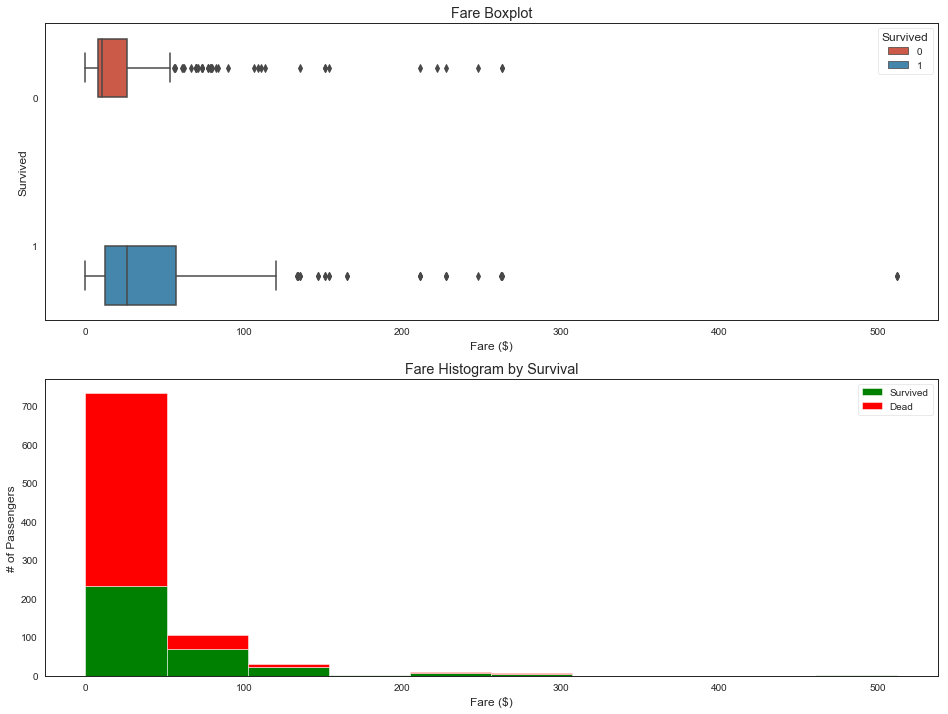

In [28]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(211)

#sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
#axis1.set_title('Pclass vs Fare Survival Comparison')

#sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
#axis2.set_title('Pclass vs Age Survival Comparison')

#plt.boxplot(x=data1['Fare'], y=data1['Survived'] showmeans = True, meanline = True)
sns.boxplot(x = 'Fare', y='Survived', hue = 'Survived', data = data1, orient='horizontal')
plt.title('Fare Boxplot')
plt.ylabel('Survived')
plt.xlabel('Fare ($)')

plt.subplot(212)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

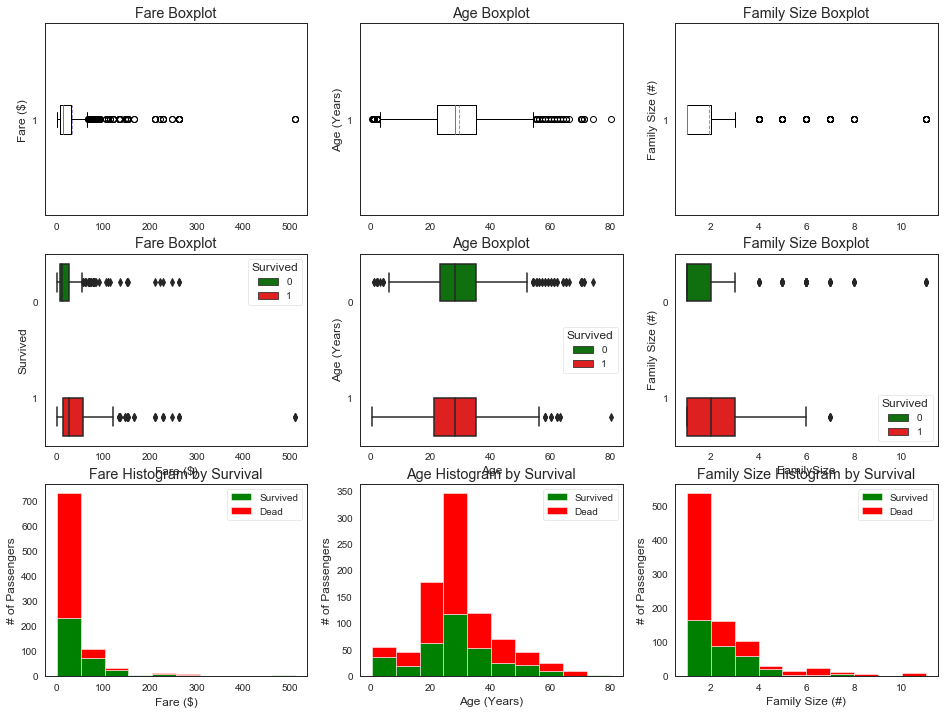

In [38]:
#IMPORTANT: Intentionally plotted different ways for learning purposes only. 

#optional plotting w/pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html

#we will use matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html

#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(331)
plt.boxplot(x=data1['Fare'], vert=False, showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(332)
plt.boxplot(data1['Age'], vert=False, showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(333)
plt.boxplot(data1['FamilySize'], vert=False, showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

palette = {0: "g", 1: "r"}

plt.subplot(334)
sns.boxplot(x = 'Fare', y='Survived', hue = 'Survived', data = data1, palette=palette, orient='horizontal')
plt.title('Fare Boxplot')
plt.ylabel('Survived')
plt.xlabel('Fare ($)')

plt.subplot(335)
sns.boxplot(x = 'Age', y='Survived', hue = 'Survived', data = data1, palette=palette, orient='horizontal')
plt.ylabel('Survived')
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(336)
sns.boxplot(x = 'FamilySize', y='Survived', hue = 'Survived', data = data1, palette=palette, orient='horizontal')
plt.ylabel('Survived')
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')


plt.subplot(337)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(338)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(339)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend();


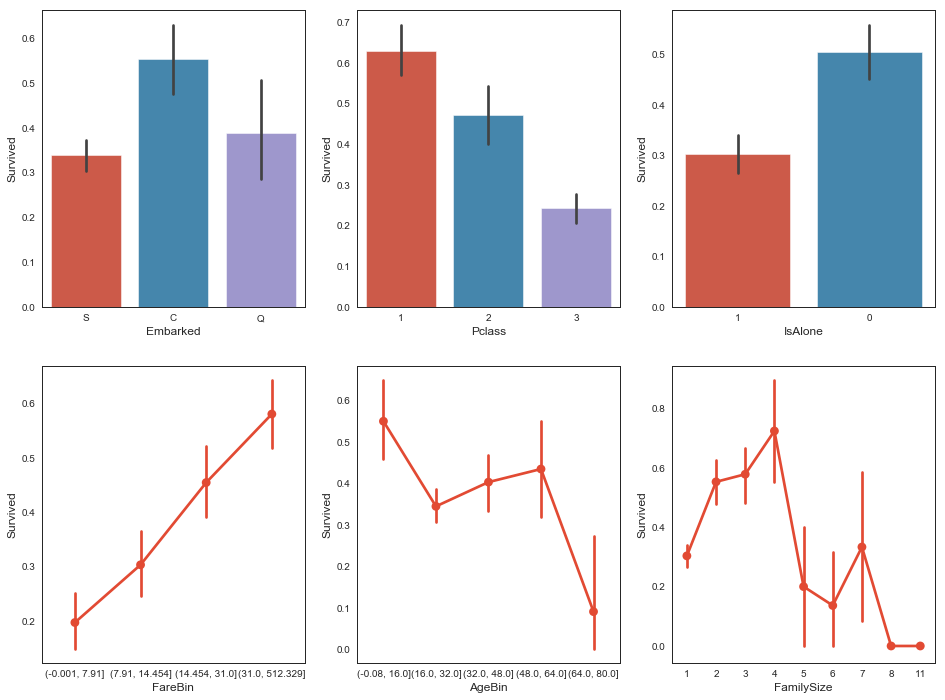

In [39]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

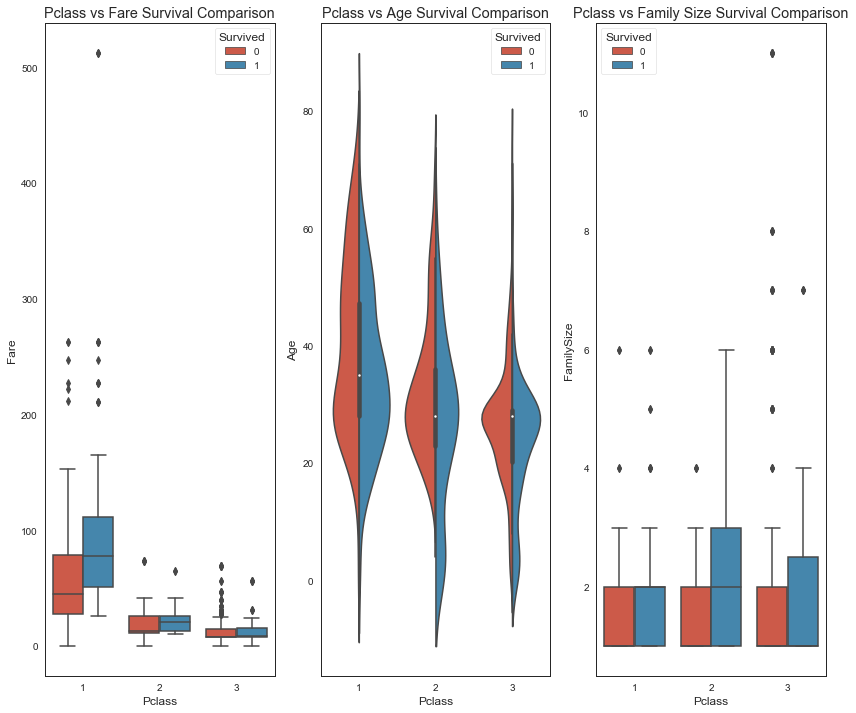

In [40]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

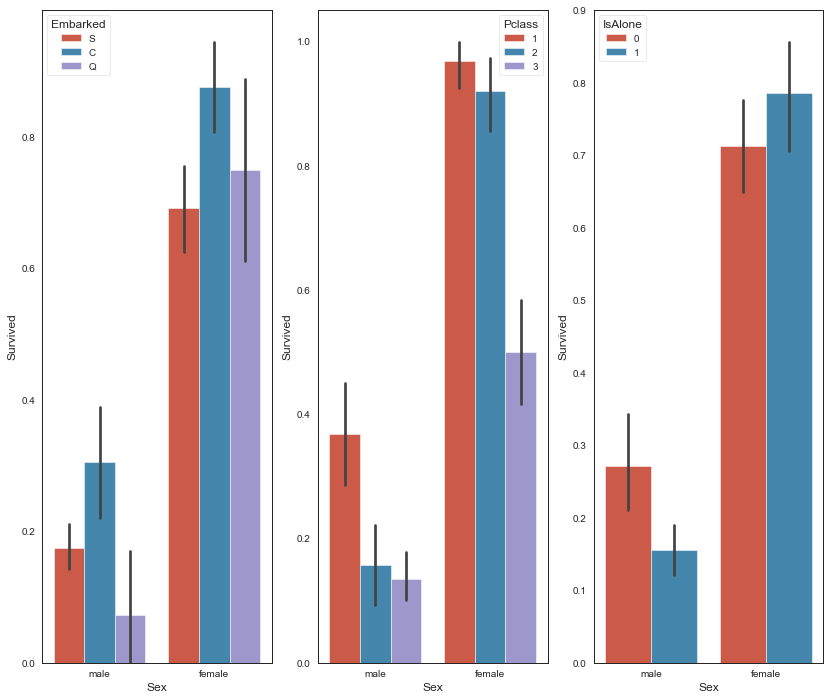

In [41]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

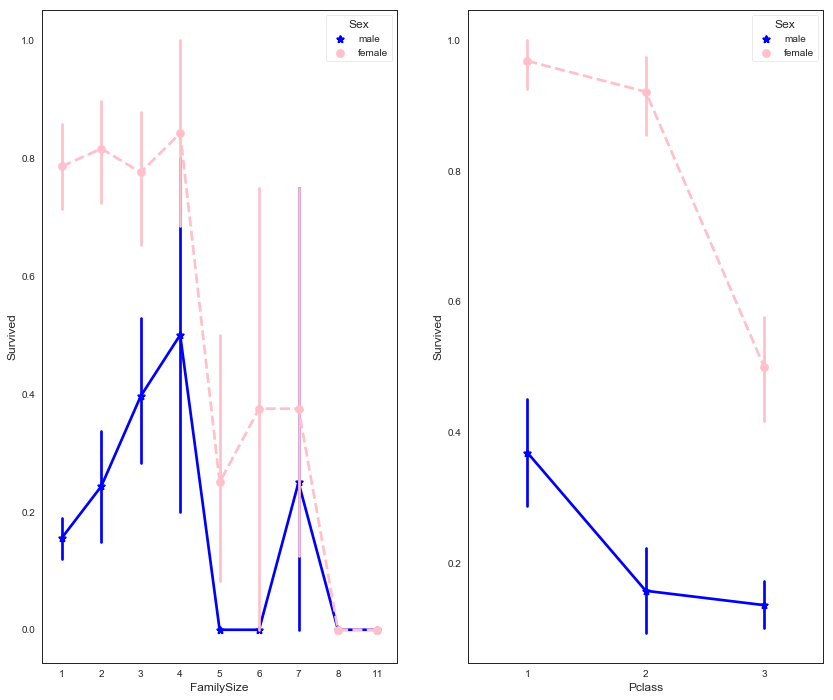

In [42]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

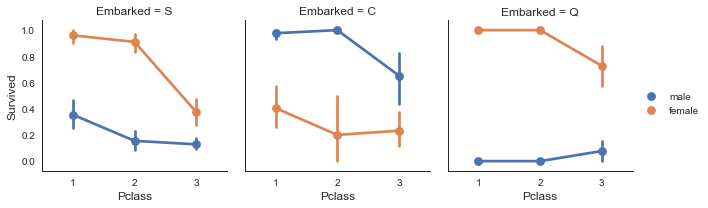

In [43]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

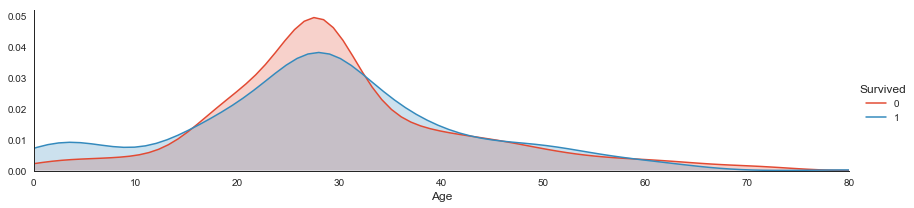

In [44]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

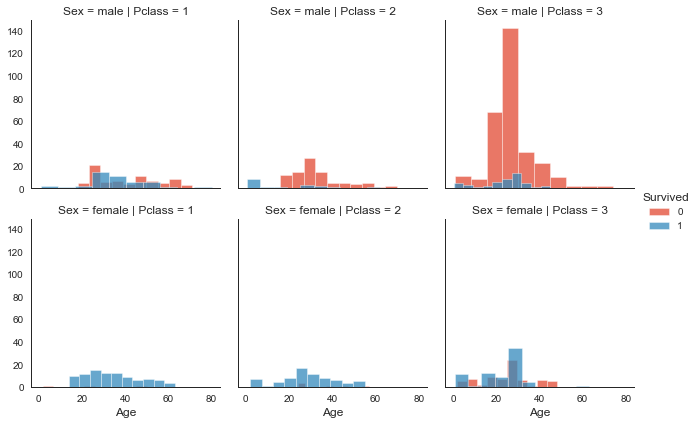

In [45]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

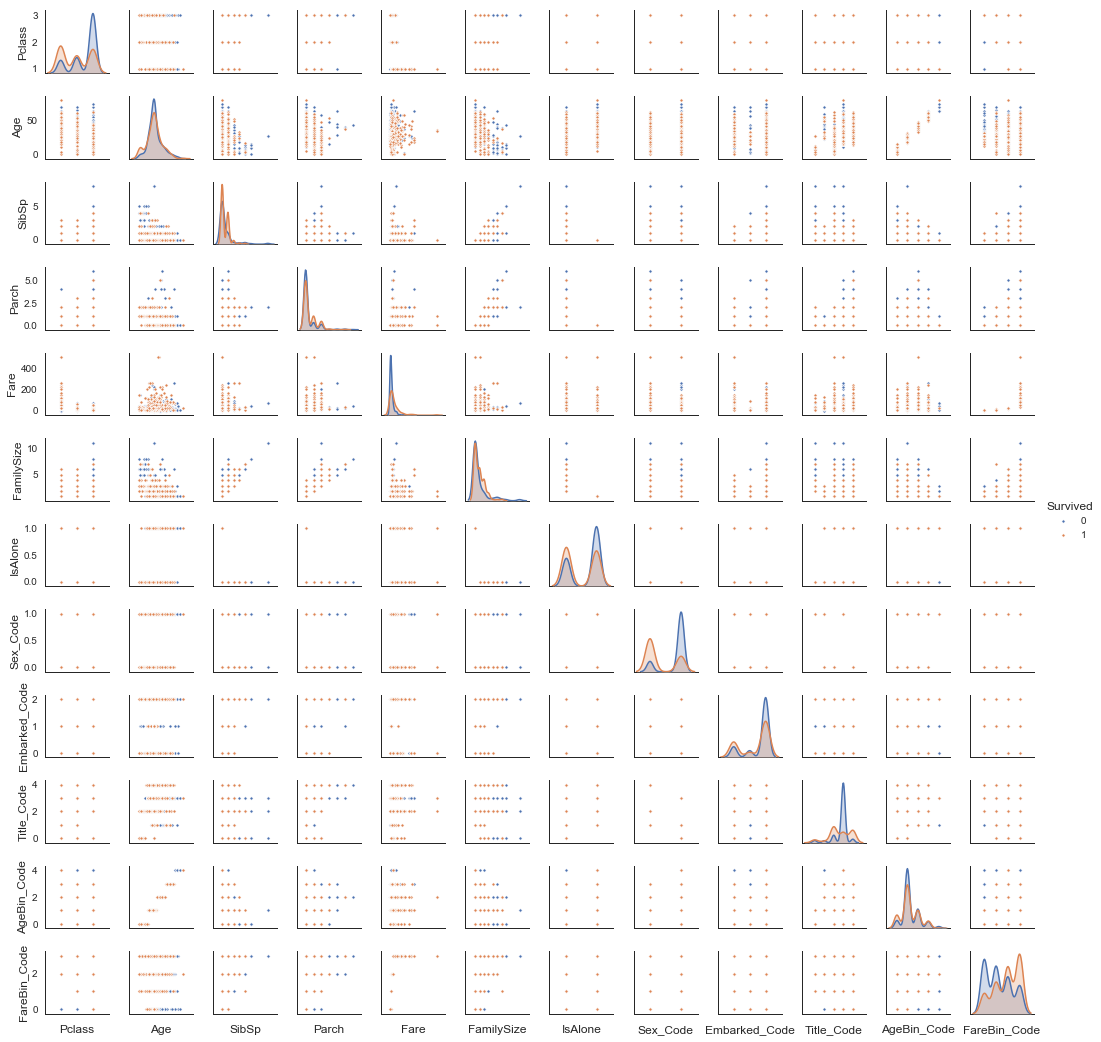

In [46]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

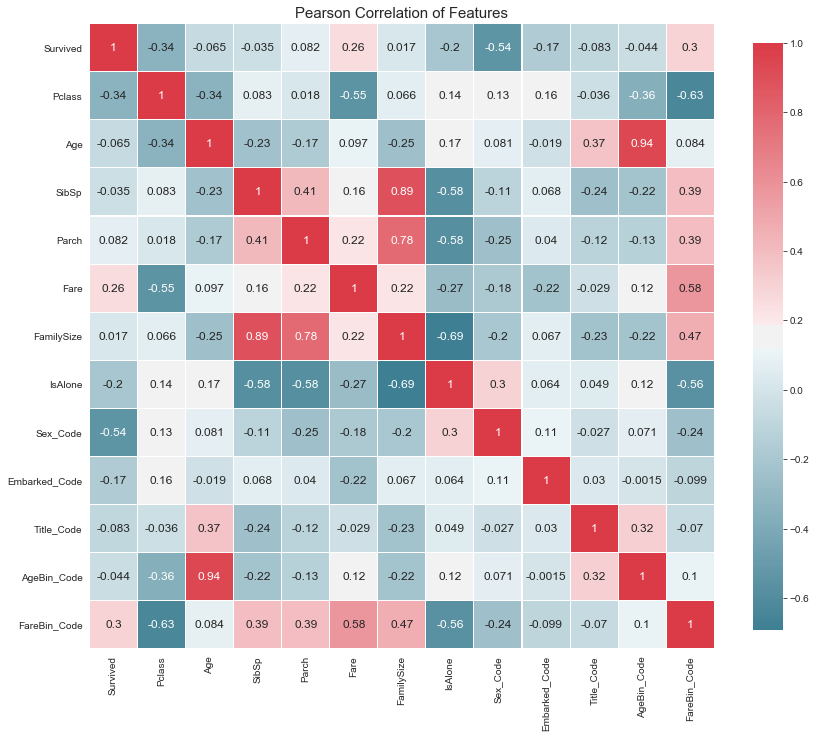

In [49]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

<hr style="border: 4px dashed #aaaaaa; border-style: none none dashed; color: #fff; background-color: #fff;"/>

<a id="ch7"></a>
# Step 5: Model Data

Since our problem is predicting if a passenger survived or did not survive, this is a discrete target variable. We will use a classification algorithm from the *sklearn* library to begin our analysis. We will use cross validation and scoring metrics, discussed in later sections, to rank and compare our algorithms’ performance.

**Machine Learning Selection:**
* [Sklearn Estimator Overview](http://scikit-learn.org/stable/user_guide.html)
* [Sklearn Estimator Detail](http://scikit-learn.org/stable/modules/classes.html)
* [Choosing Estimator Mind Map](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* [Choosing Estimator Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)


Now that we identified our solution as a supervised learning classification algorithm. We can narrow our list of choices.

**Machine Learning Classification Algorithms:**
* [Ensemble Methods](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Generalized Linear Models (GLM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Naive Bayes](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
* [Nearest Neighbors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
* [Support Vector Machines (SVM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
* [Decision Trees](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [Discriminant Analysis](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis)


### Data Science 101: How to Choose a Machine Learning Algorithm (MLA)

**"What is the best ML algorithm?"**
* The [No Free Lunch Theorem (NFLT)](http://robertmarks.org/Classes/ENGR5358/Papers/NFL_4_Dummies.pdf): there is no super algorithm, that works best in all situations and/or datasets
* try multiple MLAs, tune them, and compare them for your specific scenario
    * see research on comparing algorithms, such as 
        * [Caruana & Niculescu-Mizil 2006](https://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf) 
        * watch [video lecture here](http://videolectures.net/solomon_caruana_wslmw/) of MLA comparisons, [Ogutu et al. 2011](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3103196/) done by the NIH for genomic selection, 
        * [Fernandez-Delgado et al. 2014](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) comparing 179 classifiers from 17 families, 
        * [Thoma 2016 sklearn comparison](https://martin-thoma.com/comparing-classifiers/), 
* Also, [more data beats a better algorithm](https://www.kdnuggets.com/2015/06/machine-learning-more-data-better-algorithms.html). 

For classification, start with [Trees, Bagging, Random Forests, and Boosting](http://jessica2.msri.org/attachments/10778/10778-boost.pdf): different implementations of a decision tree
* perhaps the easiest concept to learn and understand
* easier to tune, discussed in the next section, than something like SVC

### Ensemble of ensembles

In [51]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

In [93]:
#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score = True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy 3*STD'] = cv_results['train_score'].std()*3 
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,MLA Train Accuracy 3*STD
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.0409157,0.0396307,0.027060
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890449,0.826493,0.0617704,0.037936,0.025405
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.0456629,0.0459378,0.030689
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.894944,0.826119,0.054885,0.13576,0.022813
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.823881,0.0610665,0.119774,0.023434
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822015,0.0529916,0.0879216,0.029493
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.822015,0.0534625,0.00289378,0.023434
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.8897,0.817537,0.0626166,0.0190076,0.024802
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00334082,0.027802
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820412,0.81194,0.0498606,0.0767739,0.042225


```
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
```

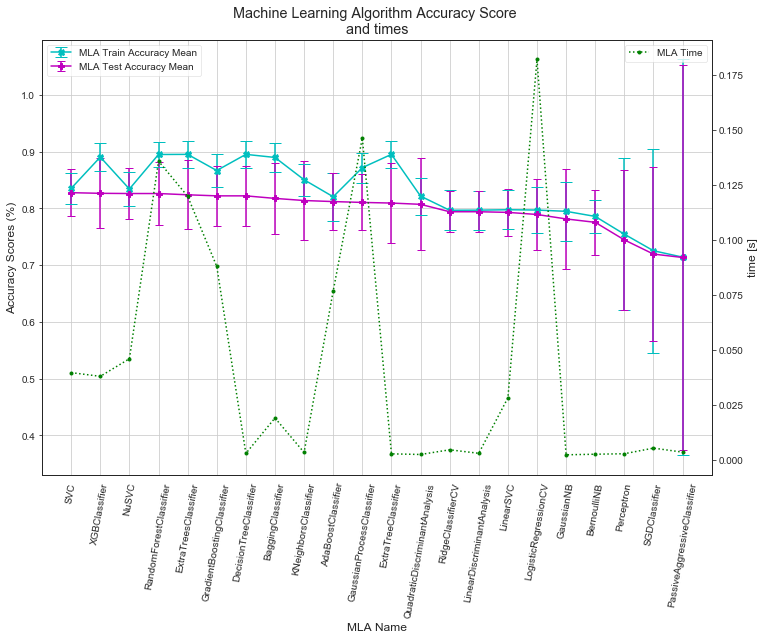

In [98]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
ax = MLA_compare.plot(
    x = 'MLA Name', 
    y='MLA Train Accuracy Mean', 
    yerr='MLA Train Accuracy 3*STD', capsize=6, color = 'c', marker='X')
MLA_compare.plot(x = 'MLA Name', 
                 y='MLA Test Accuracy Mean',
                 yerr='MLA Test Accuracy 3*STD', capsize=4, color = 'm', marker='P', ax = ax)
plt.ylabel('Accuracy Scores (%)')

maxtic = MLA_compare.index.max()
mintic = MLA_compare.index.min()

ax.set_xticks(MLA_compare.index)
ax.set_xticklabels(MLA_compare['MLA Name'].tolist(), rotation=80)
ax.legend(loc='upper left')
plt.grid()

axt = ax.twinx()
MLA_compare.plot(x = 'MLA Name', y='MLA Time', linestyle=':', color = 'g', marker='.', ax = axt)
plt.ylabel('time [s]')
plt.xlabel('Algorithms')
axt.legend(loc='upper right')
#axt.set_xticklabels(MLA_compare['MLA Name'], rotation=90)

plt.xlim(mintic-1, maxtic+1)
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \nand times');

<a id="ch8"></a>
## 5.1 Evaluate Model Performance
* able to predict passenger survival with ~82% accuracy

### Data Science 101: Determine a Baseline Accuracy ###
1. There are only two possible outcomes
    * set 50% as the worst model performance.
2. However, 1,502/2,224 or 67.5% of people died; therefore, if predict the most frequent occurrence, that 100% of people died, then right 67.5% of the time. 
    * So, set 68% as bad model performance.

### Data Science 101: How-to Create Your Own Model ###
Can we do better? Are there any signals in our data? 

To illustrate this, we're going to build our own decision tree model, because it is the easiest to conceptualize and requires simple addition and multiplication calculations. When creating a decision tree, you want to ask questions that segment your target response, placing the survived/1 and dead/0 into homogeneous subgroups. This is part science and part art, so let's just play the 21-question game to show you how it works. If you want to follow along on your own, download the train dataset and import into Excel. Create a pivot table with survival in the columns, count and % of row count in the values, and the features described below in the rows.

Remember, the name of the game is to create subgroups using a decision tree model to get survived/1 in one bucket and dead/0 in another bucket. Our rule of thumb will be the majority rules. Meaning, if the majority or 50% or more survived, then everybody in our subgroup survived/1, but if 50% or less survived then if everybody in our subgroup died/0. Also, we will stop if the subgroup is less than 10 and/or our model accuracy plateaus or decreases. Got it? Let's go!

***Question 1: Were you on the Titanic?*** If Yes, then majority (62%) died. Note our sample survival is different than our population of 68%. Nonetheless, if we assumed everybody died, our sample accuracy is 62%.

***Question 2: Are you male or female?*** Male, majority (81%) died. Female, majority (74%) survived. Giving us an accuracy of 79%.

***Question 3A (going down the female branch with count = 314): Are you in class 1, 2, or 3?*** Class 1, majority (97%) survived and Class 2, majority (92%) survived. Since the dead subgroup is less than 10, we will stop going down this branch. Class 3, is even at a 50-50 split. No new information to improve our model is gained.

***Question 4A (going down the female class 3 branch with count = 144): Did you embark from port C, Q, or S?*** We gain a little information. C and Q, the majority still survived, so no change. Also, the dead subgroup is less than 10, so we will stop. S, the majority (63%) died. So, we will change females, class 3, embarked S from assuming they survived, to assuming they died. Our model accuracy increases to 81%. 

***Question 5A (going down the female class 3 embarked S branch with count = 88):*** So far, it looks like we made good decisions. Adding another level does not seem to gain much more information. This subgroup 55 died and 33 survived, since majority died we need to find a signal to identify the 33 or a subgroup to change them from dead to survived and improve our model accuracy. We can play with our features. One I found was fare 0-8, majority survived. It's a small sample size 11-9, but one often used in statistics. We slightly improve our accuracy, but not much to move us past 82%. So, we'll stop here.

***Question 3B (going down the male branch with count = 577):*** Going back to question 2, we know the majority of males died. So, we are looking for a feature that identifies a subgroup that majority survived. Surprisingly, class or even embarked didn't matter like it did for females, but title does and gets us to 82%. Guess and checking other features, none seem to push us past 82%. So, we'll stop here for now.

You did it, with very little information, we get to 82% accuracy. On a worst, bad, good, better, and best scale, we'll set 82% to good, since it's a simple model that yields us decent results. But the question still remains, can we do better than our handmade model? 

Before we do, let's code what we just wrote above. Please note, this is a manual process created by "hand." You won't have to do this, but it's important to understand it before you start working with MLA. Think of MLA like a TI-89 calculator on a Calculus Exam. It's very powerful and helps you with a lot of the grunt work. But if you don't know what you're doing on the exam, a calculator, even a TI-89, is not going to help you pass. So, study the next section wisely.

Reference: [Cross-Validation and Decision Tree Tutorial](http://www.cs.utoronto.ca/~fidler/teaching/2015/slides/CSC411/tutorial3_CrossVal-DTs.pdf)

In [178]:
#IMPORTANT: This is a handmade model for learning purposes only.
#However, it is possible to create your own predictive model without a fancy algorithm :)

#coin flip model with random 1/survived 0/died

#iterate over dataFrame rows as (index, Series) pairs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html
for index, row in data1.iterrows(): 
    #random number generator: https://docs.python.org/2/library/random.html
    if random.random() > .5:     # Random float x, 0.0 <= x < 1.0    
        data1.set_value(index, 'Random_Predict', 1) #predict survived/1
    else: 
        data1.set_value(index, 'Random_Predict', 0) #predict died/0
    

#score random guess of survival. Use shortcut 1 = Right Guess and 0 = Wrong Guess
#the mean of the column will then equal the accuracy
data1['Random_Score'] = 0 #assume prediction wrong
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_Score'] = 1 #set to 1 for correct prediction
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))

#we can also use scikit's accuracy_score function to save us a few lines of code
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))


Coin Flip Model Accuracy: 50.06%
Coin Flip Model Accuracy w/SciKit: 50.06%


In [179]:
#group by or pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
pivot_female = data1[data1.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)

pivot_male = data1[data1.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000


In [180]:
#handmade data model using brain power (and Microsoft Excel Pivot Tables for quick calculations)
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3A Female - Class and Question 4 Embarked gain minimum information

        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0       
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))


#Accuracy Summary Report with http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
#Where recall score = (true positives)/(true positive + false negative) w/1 being best:http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#And F1 score = weighted average of precision and recall w/1 being best: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print(metrics.classification_report(data1['Survived'], Tree_Predict))



Decision Tree Model Accuracy/Precision Score: 82.04%

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



In [221]:
for i in [0,1]:
    for j in [0,1]:
        t_f = ['true','false']
        n_p = ['neg.', 'pos.']
        
        jj = (i+j)%2
    
    
        tag = f'{t_f[jj]} {n_p[i]}'
        
        print(i,j,tag)


0 0 true neg.
0 1 false neg.
1 0 false pos.
1 1 true pos.


Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[0.91 0.09]
 [0.32 0.68]]


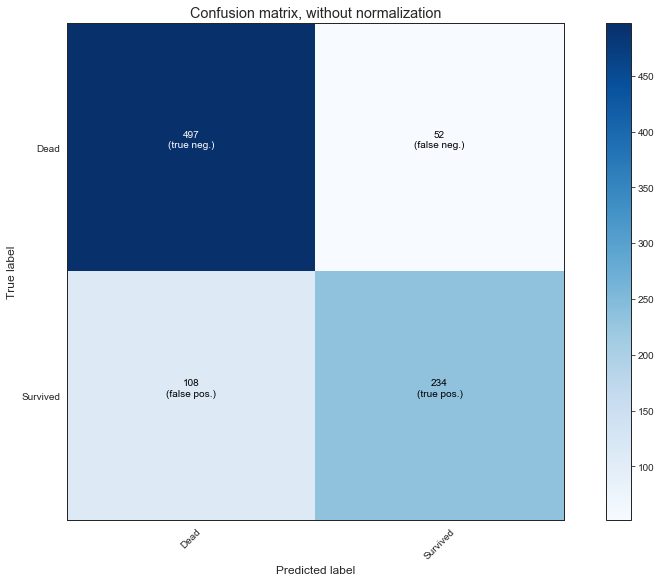

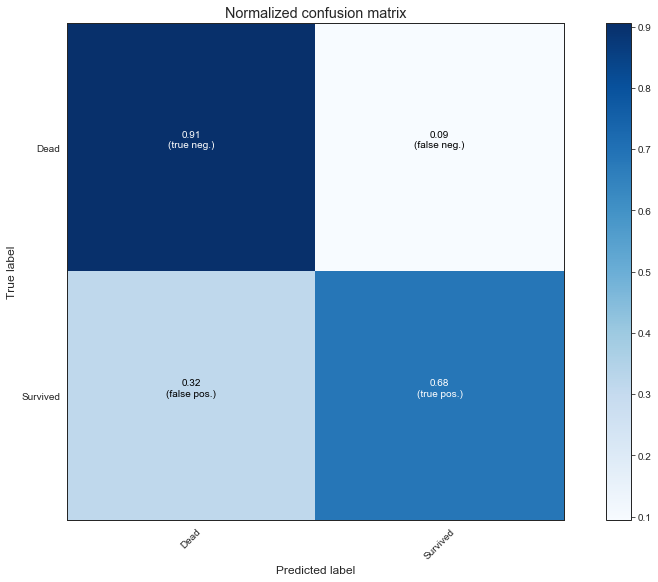

In [225]:
#Plot Accuracy Summary
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    
    def get_tag(cm,i,j,fmt):
        
        t_f = ['true','false']
        n_p = ['neg.', 'pos.']
        
        jj = (i+j)%2
        
        tag = f'({t_f[jj]} {n_p[i]})'
        val = format(cm[i, j], fmt)
        return val + '\n' + tag 
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        the_text = get_tag(cm,i,j,fmt)
        #plt.text(j, i, "{}\ntrue neg.".format(cm[i, j], fmt),
        plt.text(j, i, the_text,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')



**NOTES:** Confusion Matrix
* Total dead: 549
    * Model gets 608
        * 497 are true negatives
        * 52 are false negatives
* Total survived: 342
    * Model gets 286
        * 234 true positives
        * 108 false positives

### Coin-flip Confusion Matrix

In [192]:
Coin_Predict = pd.DataFrame({'Predict':np.random.randint(0,2,891).astype(float)})

Confusion matrix, without normalization
[[272 277]
 [173 169]]
Normalized confusion matrix
[[0.5  0.5 ]
 [0.51 0.49]]


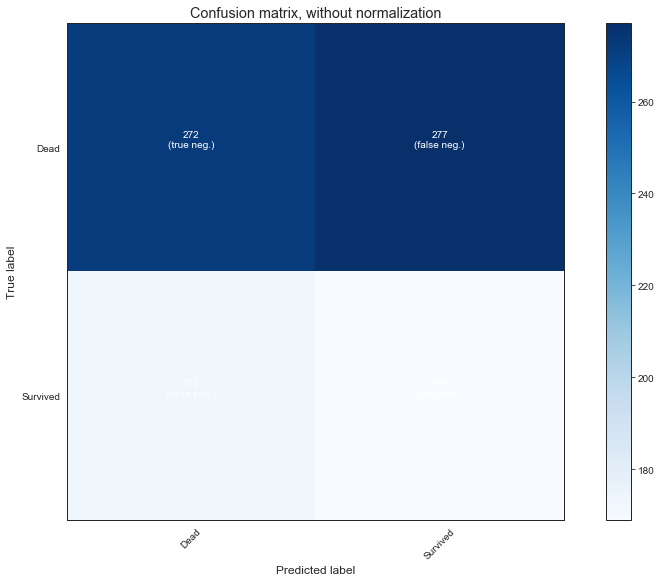

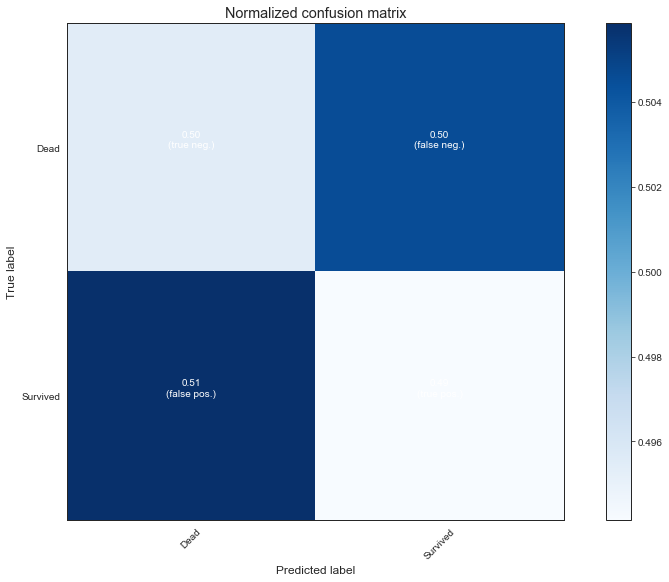

In [226]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Coin_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')



## 5.1.1 Model Performance with Cross-Validation (CV)

To mitigate overfitting, use different subsets of training data to build our model and test data to evaluate it.

##### Notes on overfitting: 
* good at "predicting" previously seen data
* bad at predicting data it has not seen
    * "like cheating on a school quiz to get 100%, but then failing at the exam because you never truly learned anything."

Use sklearn's `cross_validate` [method](http://scikit-learn.org/stable/modules/cross_validation.html#multimetric-cross-validation) to train, test, and score the model multiple times, to get an idea of how well it will perform on unseen data. 
**Note** It’s a little more expensive in computer processing.


Additionally a customized `train test split` [method](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) allows a little more randomness in our test scoring.

<a id="ch9"></a>
# 5.1.2 Tuning the Model

To tune a model, need to understand it.

## Decision-Tree Learning Algorithms (DTLA)

[sklearn Decision Tree (DT) Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), 

### Advantages and Dis-advantages 

>**Some advantages of decision trees are:**
* Simple to understand, interpret, visualize.
* Requires little data preparation; other techniques often require 
    * data normalization, 
    * dummy variables need to be created and 
    * blank values to be removed. 
    * **note** DTClassifier _does not_ support missing values!!!
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points
* handles both **numerical** _and_ **categorical** data
* handles multi-output problems.
* a white box model: observables explained by Boolean logic $\to$ interpretable
* possible to validate a model using statistical tests
* robust if its assumptions are somewhat violated by the true system

> **The disadvantages of decision trees include:**
* over-complex trees which lead to overfitting; to avoid, try:
    * pruning (not currently supported), 
    * setting the minimum number of samples required at a leaf node
    * setting the maximum depth of the tree
* sensitive to small variations in data $\to$ generates different tree
    * use decision trees within an ensemble.
* learning an optimal decision tree is NP-complete
    * in practice, DTLAs are locally optimal (at each node); no globally optimal guarantee 
        * train multiple trees in an ensemble, with randomly sampled (with replacement) features and data.
* There are processes that are hard to learn DTLAs don't have all logic built-in:
    * XOR, parity or multiplexer problems.
* usually create biased trees if some classes dominat
    * balance the dataset prior to fitting

### DTLA hyperparameters

Hyper-parameter settings will change the model accuracy.  [(Click here to learn more about parameters vs hyper-parameters.)](https://www.youtube.com/watch?v=EJtTNboTsm8)

Credit: [sklearn](http://scikit-learn.org/stable/modules/tree.html#classification)


Below are available hyper-parameters and [defintions](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):
> `class sklearn.tree.DecisionTreeClassifier(
criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)`


We will tune our model using 
* [ParameterGrid](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid), 
* [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), 
* customized [sklearn scoring](http://scikit-learn.org/stable/modules/model_evaluation.html); 
    * [click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/). 

We will then visualize our tree with [graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz).

#### Protocol for tuning hyperparameters with sklearn:

1. Start with the default model
    1. Set up the model, `dtree = tree.DecisionTreeClassifier(random_state = 0)`
    2. Select the CV., `base_results = model_selection.cross_validate(dtree, ...)`
    3. Fit the model, `dtree.fit(data1[data1_x_bin], data1[Target])`
    4. Get the default results, `base_results['test_score']` ]
2. Create the parameter grid ($N$-dim. space of hyperparams)
    `param_grid = {'criterion': ['gini', 'entropy'], ...}`
3. 'Walk' over parameter space with a grid-search to optimize the best parameter set.
    1. Set up the grid search with the model, parameter grid, scorig and cross-validation: 
        * `tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)`
    2. Fit the model(s) with the various parameters, `tune_model.fit(data1[data1_x_bin], data1[Target])`
    3. Get best param. values, `tune_model.best_params_`
    4. Check the results of the cross-validation,  `tune_model.cv_results_['mean_train_score']`

In [111]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score = True)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

#print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
tune_model.fit(data1[data1_x_bin], data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57
----------
AFTER DT Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT Training w/bin score mean: 89.35
AFTER DT Test w/bin score mean: 87.40
AFTER DT Test w/bin score 3*std: +/- 5.00
----------


```
#duplicates gridsearchcv
#tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

#print('AFTER DT Parameters: ', tune_model.best_params_)
#print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
#print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
#print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
#print('-'*10)
```

<a id="ch10"></a>
## 5.13 Tune Model with Feature Selection
more predictor variables do not make a better model, but the right predictors do: 

SKLearn's `feature_selection` [module](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has several options; use here [recursive feature elimination (RFE) with cross validation (CV)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV).

In [113]:
#base model
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)



#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data1[X_rfe], data1[Target], cv  = cv_split, return_train_score = True)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
rfe_tune_model.fit(data1[X_rfe], data1[Target])

#print(rfe_tune_model.cv_results_.keys())
#print(rfe_tune_model.cv_results_['params'])
print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.09
BEFORE DT RFE Test w/bin score 3*std: +/- 5.57
----------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 88.16
AFTER DT RFE Test w/bin score mean: 83.06
AFTER DT RFE Test w/bin score 3*std: +/- 6.22
----------
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21
----------


In [120]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names = data1_x_bin, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data, filename='gv-test', format='png', directory='./') 
graph.save();

<hr style="border: dotted rgb(0,0,0) 1.0px; background-color: rgb(0,0,0);height: 5.0px;"/>

<a id="ch11"></a>
# Step 6: Validate and Implement
The next step is to prepare for submission using the validation data. 

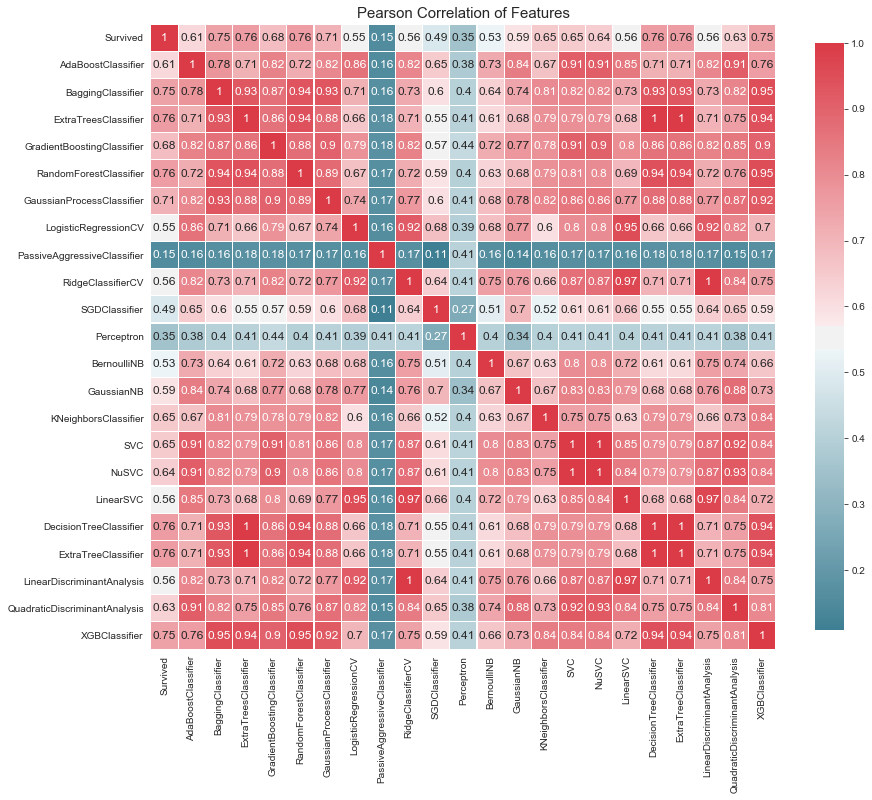

In [121]:
#compare algorithm predictions with each other, 
# where 1 = exactly similar and 0 = exactly opposite
#there are some 1's, but enough blues and light reds to create a "super algorithm" by combining them
correlation_heatmap(MLA_predict)

### Choose among many classifiers by voting

Can use `ensemble.VotingClassifier()`, as in [here](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html).

Voting is done by either:
* 'hard' vote: class label(s) predicted by the majority of classifiers
* 'soft' vote: predicts the class label based on the argmax of the sums of the predicted probabilities,
    * an ensemble of well-calibrated classifiers is recommended
    * all classifiers should have some `predict_prob` output, which give the probabilities with each prediciton

In [123]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())
]

In [134]:
#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score = True)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 87.28
Hard Voting Test w/bin score mean: 81.90
Hard Voting Test w/bin score 3*std: +/- 3.89
----------


In [135]:
#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score = True)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Soft Voting Training w/bin score mean: 87.81
Soft Voting Test w/bin score mean: 82.57
Soft Voting Test w/bin score 3*std: +/- 5.35
----------


In [32]:
#IMPORTANT: THIS SECTION IS UNDER CONSTRUCTION!!!! 12.24.17
#UPDATE: This section was scrapped for the next section; as it's more computational friendly.

#WARNING: Running is very computational intensive and time expensive
#code is written for experimental/developmental purposes and not production ready


#tune each estimator before creating a super model
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [50,100,300]
grid_ratio = [.1,.25,.5,.75,1.0]
grid_learn = [.01,.03,.05,.1,.25]
grid_max_depth = [2,4,6,None]
grid_min_samples = [5,10,.03,.05,.10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]

vote_param = [{
#            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'ada__n_estimators': grid_n_estimator,
            'ada__learning_rate': grid_ratio,
            'ada__algorithm': ['SAMME', 'SAMME.R'],
            'ada__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'bc__n_estimators': grid_n_estimator,
            'bc__max_samples': grid_ratio,
            'bc__oob_score': grid_bool, 
            'bc__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'etc__n_estimators': grid_n_estimator,
            'etc__criterion': grid_criterion,
            'etc__max_depth': grid_max_depth,
            'etc__random_state': grid_seed,


            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            'gbc__loss': ['deviance', 'exponential'],
            'gbc__learning_rate': grid_ratio,
            'gbc__n_estimators': grid_n_estimator,
            'gbc__criterion': ['friedman_mse', 'mse', 'mae'],
            'gbc__max_depth': grid_max_depth,
            'gbc__min_samples_split': grid_min_samples,
            'gbc__min_samples_leaf': grid_min_samples,      
            'gbc__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'rfc__n_estimators': grid_n_estimator,
            'rfc__criterion': grid_criterion,
            'rfc__max_depth': grid_max_depth,
            'rfc__min_samples_split': grid_min_samples,
            'rfc__min_samples_leaf': grid_min_samples,   
            'rfc__bootstrap': grid_bool,
            'rfc__oob_score': grid_bool, 
            'rfc__random_state': grid_seed,
        
            #http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'lr__fit_intercept': grid_bool,
            'lr__penalty': ['l1','l2'],
            'lr__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'lr__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'bnb__alpha': grid_ratio,
            'bnb__prior': grid_bool,
            'bnb__random_state': grid_seed,
    
            #http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'knn__n_neighbors': [1,2,3,4,5,6,7],
            'knn__weights': ['uniform', 'distance'],
            'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'knn__random_state': grid_seed,
            
            #http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'svc__C': grid_max_depth,
            'svc__gamma': grid_ratio,
            'svc__decision_function_shape': ['ovo', 'ovr'],
            'svc__probability': [True],
            'svc__random_state': grid_seed,
    
    
            #http://xgboost.readthedocs.io/en/latest/parameter.html
            'xgb__learning_rate': grid_ratio,
            'xgb__max_depth': [2,4,6,8,10],
            'xgb__tree_method': ['exact', 'approx', 'hist'],
            'xgb__objective': ['reg:linear', 'reg:logistic', 'binary:logistic'],
            'xgb__seed': grid_seed    

        }]




#Soft Vote with tuned models
#grid_soft = model_selection.GridSearchCV(estimator = vote_soft, param_grid = vote_param, cv = 2, scoring = 'roc_auc')
#grid_soft.fit(data1[data1_x_bin], data1[Target])

#print(grid_soft.cv_results_.keys())
#print(grid_soft.cv_results_['params'])
#print('Soft Vote Tuned Parameters: ', grid_soft.best_params_)
#print(grid_soft.cv_results_['mean_train_score'])
#print("Soft Vote Tuned Training w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(grid_soft.cv_results_['mean_test_score'])
#print("Soft Vote Tuned Test w/bin set score mean: {:.2f}". format(grid_soft.cv_results_['mean_test_score'][tune_model.best_index_]*100))
#print("Soft Vote Tuned Test w/bin score 3*std: +/- {:.2f}". format(grid_soft.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
#print('-'*10)


#credit: https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/
#cv_keys = ('mean_test_score', 'std_test_score', 'params')
#for r, _ in enumerate(grid_soft.cv_results_['mean_test_score']):
#    print("%0.3f +/- %0.2f %r"
#          % (grid_soft.cv_results_[cv_keys[0]][r],
#             grid_soft.cv_results_[cv_keys[1]][r] / 2.0,
#             grid_soft.cv_results_[cv_keys[2]][r]))


#print('-'*10)


In [33]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1_x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 37.28 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 33.04 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 68.93 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 38.77 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 84.14 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 6.19 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_stat

In [34]:
#Hard Vote or majority rules w/Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities w/Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data1[data1_x_bin], data1[Target], cv  = cv_split)
grid_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)


#12/31/17 tuned with data1_x_bin
#The best parameter for AdaBoostClassifier is {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 33.39 seconds.
#The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 30.28 seconds.
#The best parameter for ExtraTreesClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 64.76 seconds.
#The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 34.35 seconds.
#The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 76.32 seconds.
#The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 6.01 seconds.
#The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 0, 'solver': 'liblinear'} with a runtime of 8.04 seconds.
#The best parameter for BernoulliNB is {'alpha': 0.1} with a runtime of 0.19 seconds.
#The best parameter for GaussianNB is {} with a runtime of 0.04 seconds.
#The best parameter for KNeighborsClassifier is {'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'uniform'} with a runtime of 4.84 seconds.
#The best parameter for SVC is {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'probability': True, 'random_state': 0} with a runtime of 29.39 seconds.
#The best parameter for XGBClassifier is {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0} with a runtime of 46.23 seconds.
#Total optimization time was 5.56 minutes.

Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.22
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.31
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.26
----------
Soft Voting w/Tuned Hyperparameters Training w/bin score mean: 84.76
Soft Voting w/Tuned Hyperparameters Test w/bin score mean: 82.28
Soft Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 5.42
----------


In [35]:
#prepare data for modeling
print(data_val.info())
print("-"*10)
#data_val.sample(10)



#handmade decision tree - submission score = 0.77990
data_val['Survived'] = mytree(data_val).astype(int)


#decision tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_dt = tree.DecisionTreeClassifier()
#submit_dt = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
#submit_dt.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_dt.best_params_) #Best Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
#data_val['Survived'] = submit_dt.predict(data_val[data1_x_bin])


#bagging w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77990
#submit_bc = ensemble.BaggingClassifier()
#submit_bc = model_selection.GridSearchCV(ensemble.BaggingClassifier(), param_grid= {'n_estimators':grid_n_estimator, 'max_samples': grid_ratio, 'oob_score': grid_bool, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_bc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_bc.best_params_) #Best Parameters:  {'max_samples': 0.25, 'n_estimators': 500, 'oob_score': True, 'random_state': 0}
#data_val['Survived'] = submit_bc.predict(data_val[data1_x_bin])


#extra tree w/full dataset modeling submission score: defaults= 0.76555, tuned= 0.77990
#submit_etc = ensemble.ExtraTreesClassifier()
#submit_etc = model_selection.GridSearchCV(ensemble.ExtraTreesClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_etc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_etc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_etc.predict(data_val[data1_x_bin])


#random foreset w/full dataset modeling submission score: defaults= 0.71291, tuned= 0.73205
#submit_rfc = ensemble.RandomForestClassifier()
#submit_rfc = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid={'n_estimators': grid_n_estimator, 'criterion': grid_criterion, 'max_depth': grid_max_depth, 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_rfc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_rfc.best_params_) #Best Parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0}
#data_val['Survived'] = submit_rfc.predict(data_val[data1_x_bin])



#ada boosting w/full dataset modeling submission score: defaults= 0.74162, tuned= 0.75119
#submit_abc = ensemble.AdaBoostClassifier()
#submit_abc = model_selection.GridSearchCV(ensemble.AdaBoostClassifier(), param_grid={'n_estimators': grid_n_estimator, 'learning_rate': grid_ratio, 'algorithm': ['SAMME', 'SAMME.R'], 'random_state': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_abc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_abc.best_params_) #Best Parameters:  {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0}
#data_val['Survived'] = submit_abc.predict(data_val[data1_x_bin])


#gradient boosting w/full dataset modeling submission score: defaults= 0.75119, tuned= 0.77033
#submit_gbc = ensemble.GradientBoostingClassifier()
#submit_gbc = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid={'learning_rate': grid_ratio, 'n_estimators': grid_n_estimator, 'max_depth': grid_max_depth, 'random_state':grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_gbc.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_gbc.best_params_) #Best Parameters:  {'learning_rate': 0.25, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
#data_val['Survived'] = submit_gbc.predict(data_val[data1_x_bin])

#extreme boosting w/full dataset modeling submission score: defaults= 0.73684, tuned= 0.77990
#submit_xgb = XGBClassifier()
#submit_xgb = model_selection.GridSearchCV(XGBClassifier(), param_grid= {'learning_rate': grid_learn, 'max_depth': [0,2,4,6,8,10], 'n_estimators': grid_n_estimator, 'seed': grid_seed}, scoring = 'roc_auc', cv = cv_split)
#submit_xgb.fit(data1[data1_x_bin], data1[Target])
#print('Best Parameters: ', submit_xgb.best_params_) #Best Parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300, 'seed': 0}
#data_val['Survived'] = submit_xgb.predict(data_val[data1_x_bin])


#hard voting classifier w/full dataset modeling submission score: defaults= 0.75598, tuned = 0.77990
#data_val['Survived'] = vote_hard.predict(data_val[data1_x_bin])
data_val['Survived'] = grid_hard.predict(data_val[data1_x_bin])


#soft voting classifier w/full dataset modeling submission score: defaults= 0.73684, tuned = 0.74162
#data_val['Survived'] = vote_soft.predict(data_val[data1_x_bin])
#data_val['Survived'] = grid_soft.predict(data_val[data1_x_bin])


#submit file
submit = data_val[['PassengerId','Survived']]
submit.to_csv("../working/submit.csv", index=False)

print('Validation Data Distribution: \n', data_val['Survived'].value_counts(normalize = True))
submit.sample(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Name             418 non-null object
Sex              418 non-null object
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Fare             418 non-null float64
Cabin            91 non-null object
Embarked         418 non-null object
FamilySize       418 non-null int64
IsAlone          418 non-null int64
Title            418 non-null object
FareBin          418 non-null category
AgeBin           418 non-null category
Sex_Code         418 non-null int64
Embarked_Code    418 non-null int64
Title_Code       418 non-null int64
AgeBin_Code      418 non-null int64
FareBin_Code     418 non-null int64
dtypes: category(2), float64(2), int64(11), object(6)
memory usage: 63.1+ KB
None
----------
Validation Data Distribution: 


,PassengerId,Survived
113,1005,1
69,961,1
70,962,1
191,1083,0
376,1268,1
37,929,1
46,938,1
236,1128,0
294,1186,0
366,1258,0


<a id="ch90"></a>
## Change Log:
11/22/17 Please note, this kernel is currently in progress, but open to feedback. Thanks!  
11/23/17 Cleaned up published notebook and updated through step 3.  
11/25/17 Added enhancements to published notebook and started step 4.  
11/26/17 Skipped ahead to data model, since this is a published notebook. Accuracy with (very) simple data cleaning and logistic regression is **~82%**. Continue to up vote and I will continue to develop this notebook. Thanks!  
12/2/17 Updated section 4 with exploratory analysis and section 5 with more classifiers. Improved model to **~85%** accuracy.  
12/3/17 Update section 4 with improved graphical statistics.  
12/7/17 Updated section 5 with Data Science 101 Lesson.  
12/8/17 Reorganized section 3 & 4 with cleaner code.  
12/9/17 Updated section 5 with model optimization how-tos. Initial competition submission with Decision Tree; will update with better algorithm later.  
12/10/17 Updated section 3 & 4 with cleaner code and better datasets.  
12/11/17 Updated section 5 with better how-tos.  
12/12/17 Cleaned section 5 to prep for hyper-parameter tuning.  
12/13/17 Updated section 5 to focus on learning data modeling via decision tree.  
12/20/17 Updated section 4 - Thanks @Daniel M. for suggestion to split up visualization code. Started working on section 6 for "super" model.  
12/23/17 Edited section 1-5 for clarity and more concise code.  
12/24/17 Updated section 5 with random_state and score for more consistent results.  
12/31/17 Completed data science framework iteration 1 and added section 7 with conclusion.  

<a id="ch91"></a>
# Credits
Programming is all about "borrowing" code, because knife sharpens knife. Nonetheless, I want to give credit, where credit is due. 

* [Introduction to Machine Learning with Python: A Guide for Data Scientists by Andreas Müller and Sarah Guido](https://www.amazon.com/gp/product/1449369413/ref=as_li_tl?ie=UTF8&tag=kaggle-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1449369413&linkId=740510c3199892cca1632fe738fb8d08) - Machine Learning 101 written by a core developer of sklearn
* [Visualize This: The Flowing Data Guide to Design, Visualization, and Statistics by Nathan Yau](https://www.amazon.com/gp/product/0470944889/ref=as_li_tl?ie=UTF8&tag=kaggle-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=0470944889&linkId=f797da48813ed5cfc762ce5df8ef957f) - Learn the art and science of data visualization
* [Machine Learning for Dummies by John Mueller and Luca Massaron ](https://www.amazon.com/gp/product/1119245516/ref=as_li_tl?ie=UTF8&tag=kaggle-20&camp=1789&creative=9325&linkCode=as2&creativeASIN=1119245516&linkId=5b4ac9a6fd1da198d82f9ca841d1af9f) - Easy to understand for a beginner book, but detailed to actually learn the fundamentals of the topic
